COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [16]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone -b explanations https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 352, done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 352 (delta 30), reused 57 (delta 14), pack-reused 271
Receiving objects: 100% (352/352), 7.53 MiB | 18.84 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil,floor
import helper_funcs as helper

In [18]:
model_root_dir = '/content/'

mnist = helper.MNIST_data(model_root_dir+'MNIST_data/')

Download complete.
Save complete.


In [0]:
image_dims = (28,28)
input_size = 28**2
num_classes = 10

In [0]:
batch_size = 100
learning_rate = 0.5

epochs = 2
iterations = ceil(mnist.number_train_samples/batch_size)

In [0]:
def forward_pass(x):
    
    x = x.reshape(-1,input_size)
  
    output = np.matmul(x,W) + b

    return(output)

In [0]:
def softmax(x):
    
    x = x - np.max(x,axis=1,keepdims=True)
    
    output = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    return(output)

In [0]:
def cross_entropy(labels,logits):
    
    labels = labels.reshape(-1,num_classes)
    logits = logits.reshape(-1,num_classes)
    
    losses = -np.sum(labels*np.log(logits), axis=1)
    
    loss = np.mean(losses)
    
    return(loss)

In [0]:
def back_prop(inputs,softmax_outputs,labels):
    
    batch_size = inputs.shape[0]

    s_ce_prime = softmax_outputs - labels

    W_deltas = np.matmul(inputs.transpose(),s_ce_prime)
    b_deltas = np.sum(s_ce_prime,axis=0)
    
    W_deltas /= batch_size
    b_deltas /= batch_size
        
    global W
    W -= learning_rate*W_deltas
    global b
    b -= learning_rate*b_deltas
    

In [0]:
def calculate_accuracy(logits,labels):
    
    marking = np.equal(np.argmax(logits,axis=1),np.argmax(labels,axis=1))
    return(np.mean(marking.astype(np.int32)))

In [0]:
W = np.random.randn(input_size,num_classes)
b = np.random.randn(num_classes)

In [27]:
losses = np.array([])

for epoch in range(epochs):
    print('New epoch', str(epoch+1)+'/'+str(epochs))
    for iteration in range(iterations):
        
        X,Y = mnist.get_batch(iteration,batch_size)
        
        nn_out = forward_pass(X)
        soft_out = softmax(nn_out)
        ce_out = cross_entropy(Y,soft_out)
        
        back_prop(X,soft_out,Y)

        if (iteration+1) % floor(iterations/5) == 0:
            
            accuracy = calculate_accuracy(forward_pass(mnist.validation_images),mnist.validation_labels)
            
            print('step', str(iteration+1)+'/'+str(iterations), 'loss', ce_out, 'accuracy', str(round(100*accuracy,2))+'%')

        losses = np.append(losses, ce_out)

New epoch 1/2
step 110/550 loss 1.3281615278843848 accuracy 79.02%
step 220/550 loss 0.9930446921107148 accuracy 83.92%
step 330/550 loss 1.2518658103519529 accuracy 85.86%
step 440/550 loss 0.8584459363673618 accuracy 86.7%
step 550/550 loss 0.8306408928278007 accuracy 87.92%
New epoch 2/2
step 110/550 loss 0.7068506511633984 accuracy 88.46%
step 220/550 loss 0.6626265080471734 accuracy 88.88%
step 330/550 loss 0.8468440809520226 accuracy 89.16%
step 440/550 loss 0.6771398374029216 accuracy 89.1%
step 550/550 loss 0.5608070097212208 accuracy 89.62%


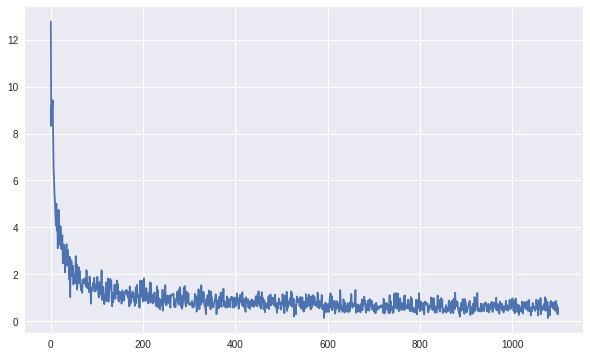

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [29]:
accuracy = calculate_accuracy(forward_pass(mnist.test_images),mnist.test_labels)
print('accuracy:', str(round(100*accuracy,2))+'%')

accuracy: 88.07%
